Dimensions des données : (1000, 20)
Dimensions des étiquettes : (1000,)


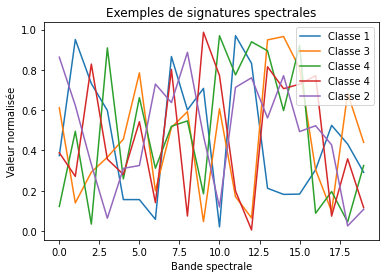

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données d'imagerie spectrale simulées
def generate_spectral_data(num_samples, num_bands, num_classes):
    np.random.seed(42)
    data = np.random.rand(num_samples, num_bands)  # Données spectrales
    labels = np.random.randint(0, num_classes, num_samples)  # Classes cibles
    return data, labels

# Génération de données simulées avec 20 bandes spectrales
data, labels = generate_spectral_data(num_samples=1000, num_bands=20, num_classes=5)

# Dimensions des données
print("Dimensions des données :", data.shape)
print("Dimensions des étiquettes :", labels.shape)

# Affichage d'un échantillon de courbes spectrales
for i in range(5):
    plt.plot(data[i], label=f"Classe {labels[i]}")
plt.title("Exemples de signatures spectrales")
plt.xlabel("Bande spectrale")
plt.ylabel("Valeur normalisée")
plt.legend()
plt.show()

In [ ]:
data = data / data.max()
from tensorflow.keras.utils import to_categorical
labels_one_hot = to_categorical(labels, num_classes=5)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels_one_hot, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Création du modèle
input_dim = X_train.shape[1]
num_classes = y_train.shape[1]
model = create_model(input_dim, num_classes)

Epoch 1/20
20/20 [==============================] - 1s 15ms/step - loss: 1.6292 - accuracy: 0.1719 - val_loss: 1.6158 - val_accuracy: 0.1813
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 1.6158 - accuracy: 0.2000 - val_loss: 1.6071 - val_accuracy: 0.2375
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 1.6089 - accuracy: 0.2031 - val_loss: 1.6053 - val_accuracy: 0.2062
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 1.6034 - accuracy: 0.2250 - val_loss: 1.6056 - val_accuracy: 0.2000
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 1.5919 - accuracy: 0.2297 - val_loss: 1.6091 - val_accuracy: 0.1875
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 1.5859 - accuracy: 0.2719 - val_loss: 1.6065 - val_accuracy: 0.2125
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 1.5789 - accuracy: 0.2797 - val_loss: 1.6061 - val_accuracy: 0.2000
Epoch 8/20
20/20 [=

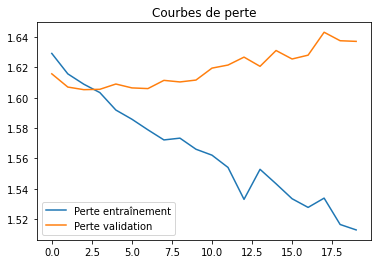

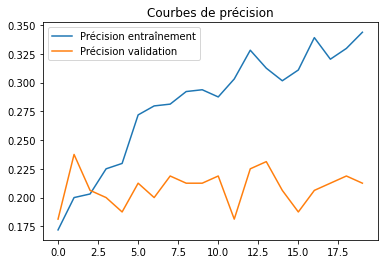

In [4]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=20, 
                    batch_size=32)

# Tracé des courbes de perte et de précision
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.legend()
plt.title("Courbes de perte")
plt.show()

plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.legend()
plt.title("Courbes de précision")
plt.show()


7/7 [==============================] - 0s 7ms/step - loss: 1.6664 - accuracy: 0.1900
Perte sur le test : 1.6664217710494995
Précision sur le test : 0.1899999976158142


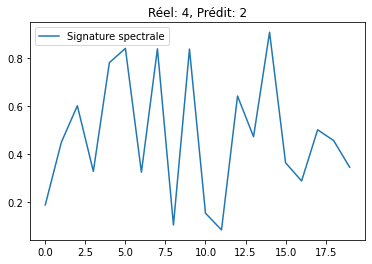

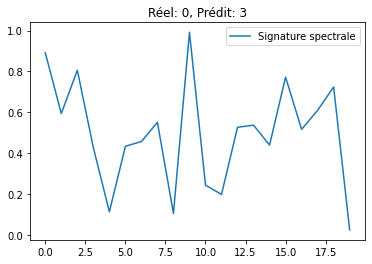

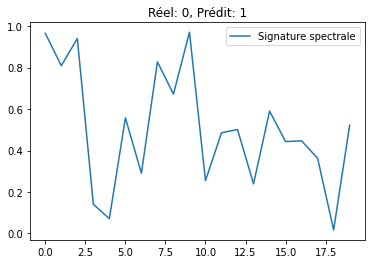

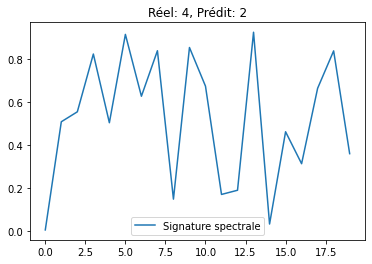

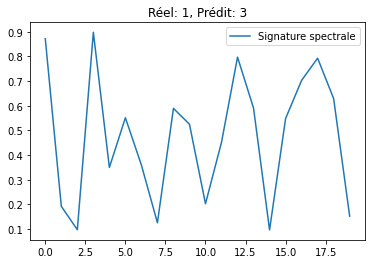

In [5]:
# Évaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perte sur le test : {loss}")
print(f"Précision sur le test : {accuracy}")

# Prédictions
predictions = model.predict(X_test)

# Visualisation des résultats
for i in range(5):
    plt.plot(X_test[i], label='Signature spectrale')
    plt.title(f"Réel: {np.argmax(y_test[i])}, Prédit: {np.argmax(predictions[i])}")
    plt.legend()
    plt.show()